# EDA in Pandas

In [74]:
#Packages needed to load before starting Data Cleaning process

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import chardet

In [75]:
# since I am using a file in my local drive, I used this expression to open according the enconding done

file_path = r"C:\Users\Juan.Cardenas\Documents\Python Scripts\EDA project\Most Streamed Spotify Songs 2024.csv"
# Detect the encoding
with open(file_path, 'rb') as f:
    result = chardet.detect(f.read())

encoding = result['encoding']

# Read the CSV with the detected encoding
df = pd.read_csv(file_path, encoding=encoding)

df.head()


,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1


In [76]:
#this is to set 1 decimal numbers after the point.
pd.set_option('display.float_format', lambda x: '%.1f' % x)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   object 
 8   Spotify Playlist Count      4530 non-null   object 
 9   Spotify Playlist Reach      4528 non-null   object 
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   object 
 12  YouTube Likes               4285 non-null   object 
 13  TikTok Posts                3427 

# Data Cleaning

### Identify NaN in each Column of the original Data Frame.
### Create a new DataFrame with all the NaN values



In [78]:
df_nanvalues = pd.DataFrame(df.isnull().sum()).reset_index().rename(columns={'index':'Track',0:'NaN Values'})
df_nanvalues.drop(index=df.index[0], axis=0, inplace=True)
df_nanvalues[df_nanvalues['NaN Values']>0].sort_values(by='NaN Values', ascending=False)

,Track,NaN Values
27,TIDAL Popularity,4600
25,Soundcloud Streams,3333
19,SiriusXM Spins,2123
24,Pandora Track Stations,1268
13,TikTok Posts,1173
23,Pandora Streams,1106
22,Amazon Playlist Count,1055
16,YouTube Playlist Reach,1009
15,TikTok Views,981
14,TikTok Likes,980


### Remove columns that contain no information to keep consistency.

In [79]:
df.drop('TIDAL Popularity', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   object 
 8   Spotify Playlist Count      4530 non-null   object 
 9   Spotify Playlist Reach      4528 non-null   object 
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   object 
 12  YouTube Likes               4285 non-null   object 
 13  TikTok Posts                3427 

### Verify data type for selected column and convert to correct one (if needed).
### Object --> Integer (remove comas ',')


In [80]:
df['Spotify Playlist Count'] = df['Spotify Playlist Count'].fillna(0)
df['Spotify Playlist Count'].isnull().sum()

0

In [81]:
df['Spotify Playlist Count'] = df['Spotify Playlist Count'].apply(lambda x: str(x).replace(',', ''))
df['Spotify Playlist Count']

0        30716
1        28113
2        54331
3       269802
4         7223
         ...  
4595     65770
4596      4602
4597     72066
4598     14037
4599     32138
Name: Spotify Playlist Count, Length: 4600, dtype: object

In [83]:
df['Spotify Playlist Count'] = df['Spotify Playlist Count'].astype('int16')
df['Spotify Playlist Count'].dtype

dtype('int16')

### Format date - assing correct one

#### Extract Month and Year

In [84]:
df['Release Date'] = pd.to_datetime(df['Release Date'])
df['Release Date']

0      2024-04-26
1      2024-05-04
2      2024-03-19
3      2023-01-12
4      2024-05-31
          ...    
4595   2017-09-05
4596   2018-07-27
4597   2020-02-28
4598   2016-11-08
4599   2017-04-11
Name: Release Date, Length: 4600, dtype: datetime64[ns]

In [85]:
df['Month'] = df['Release Date'].dt.month
df['Month']

0        4
1        5
2        3
3        1
4        5
        ..
4595     9
4596     7
4597     2
4598    11
4599     4
Name: Month, Length: 4600, dtype: int32

In [86]:
df['Year'] = df['Release Date'].dt.year
df['Year']

0       2024
1       2024
2       2024
3       2023
4       2024
        ... 
4595    2017
4596    2018
4597    2020
4598    2016
4599    2017
Name: Year, Length: 4600, dtype: int32

### Look for duplicates (and remove any if needed)

In [87]:
df_duplicate =pd.DataFrame(df.duplicated()).rename(columns={0:'Duplicate'})
df_duplicate[df_duplicate ['Duplicate'] == True]


,Duplicate
2450,True
3450,True


In [88]:
df.iloc[[2450,3450]]

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,Explicit Track,Month,Year
2450,Tennessee Orange,Tennessee Orange,Megan Moroney,2022-09-02,TCAGJ2289254,"2,424",28.9,"227,893,586",28139,"12,480,714",...,5.0,"1,370",49.0,"56,972,562","26,968","1,336,043","708,143",0,9,2022
3450,Dembow,Dembow,Danny Ocean,2017-12-08,USWL11700269,"3,441",23.3,"579,189,526",-5139,"11,805,084",...,20.0,"37,649",12.0,"6,723,858","7,832",NaN,"1,619,550",0,12,2017


In [89]:
filtered_df = df[df['ISRC'].str.contains('TCAGJ2289254') | df['ISRC'].str.contains('USWL11700269')]
filtered_df

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,Explicit Track,Month,Year
2449,Tennessee Orange,Tennessee Orange,Megan Moroney,2022-09-02,TCAGJ2289254,"2,424",28.9,"227,893,586",28139,"12,480,714",...,5.0,"1,370",49.0,"56,972,562","26,968","1,336,043","708,143",0,9,2022
2450,Tennessee Orange,Tennessee Orange,Megan Moroney,2022-09-02,TCAGJ2289254,"2,424",28.9,"227,893,586",28139,"12,480,714",...,5.0,"1,370",49.0,"56,972,562","26,968","1,336,043","708,143",0,9,2022
3447,Dembow,Dembow,Danny Ocean,2017-12-08,USWL11700269,"3,441",23.3,"579,189,526",-5139,"11,805,084",...,20.0,"37,649",12.0,"6,723,858","7,832",NaN,"1,619,550",0,12,2017
3450,Dembow,Dembow,Danny Ocean,2017-12-08,USWL11700269,"3,441",23.3,"579,189,526",-5139,"11,805,084",...,20.0,"37,649",12.0,"6,723,858","7,832",NaN,"1,619,550",0,12,2017


### Univariate Analysis

#### Category: Artist with Explicit tracks

In [90]:
explicit_track = df[df['Explicit Track']==1]
Count_artist = explicit_track['Artist'].value_counts()
Count_artist

Artist
Drake           54
Bad Bunny       42
Travis Scott    29
Future          22
Juice WRLD      21
                ..
mgk              1
Davido           1
Alok             1
MC Fioti         1
BUSHIDO ZHO      1
Name: count, Length: 678, dtype: int64

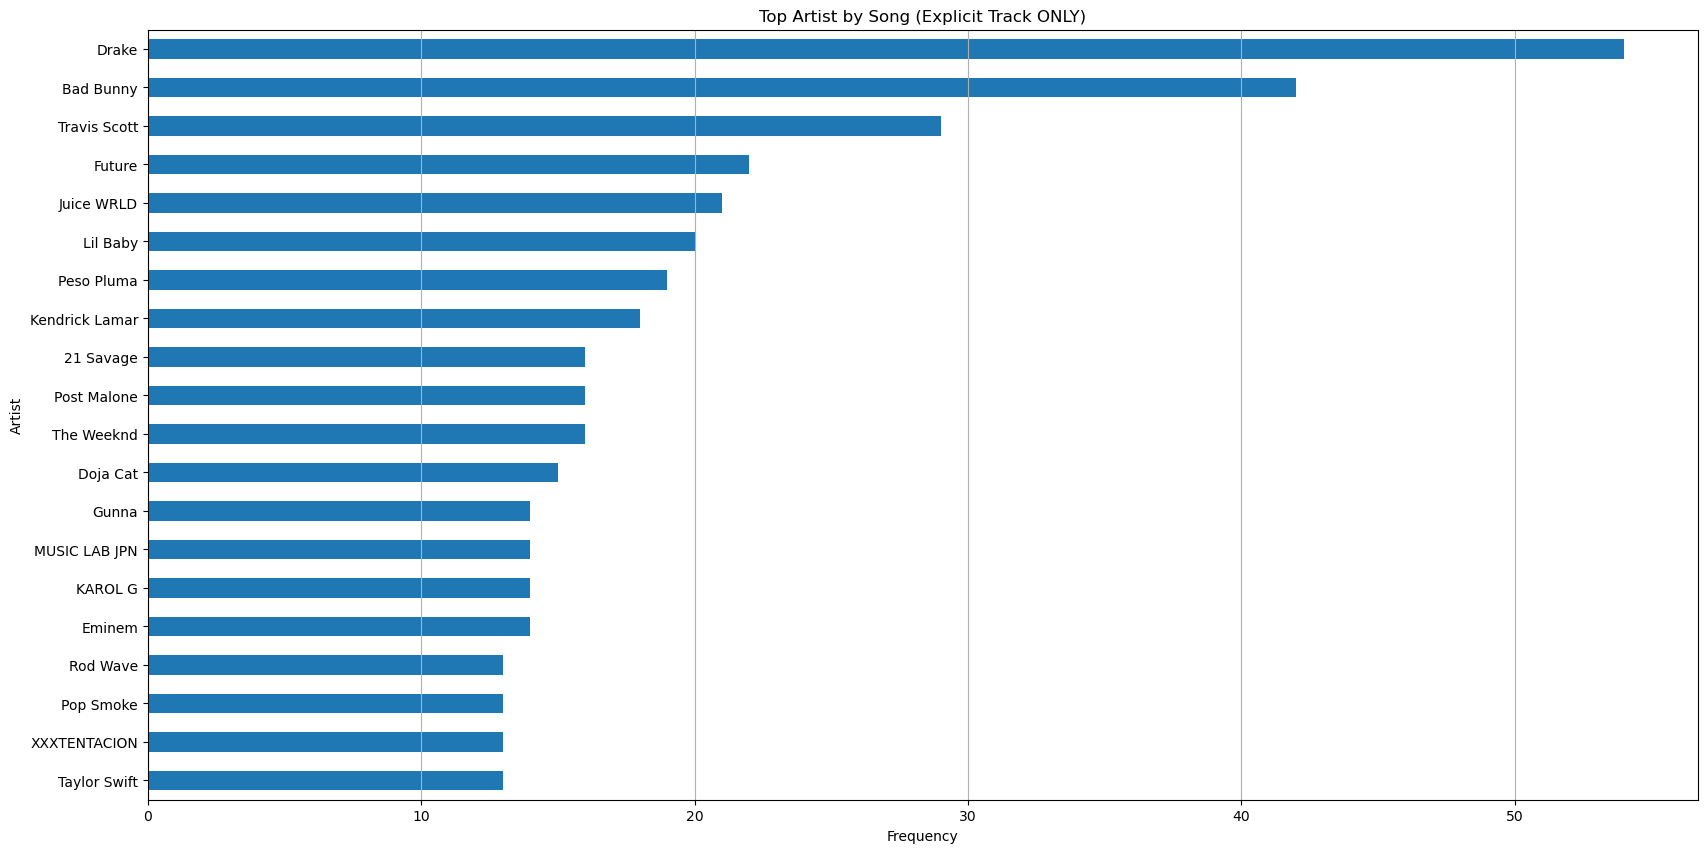

In [91]:
plt.figure(figsize=(20, 10))
Count_artist.head(20).plot(kind='barh')

# Add labels and title
plt.xlabel('Frequency')
plt.ylabel('Artist')
plt.title('Top Artist by Song (Explicit Track ONLY)')
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.show()

### Univariate Analysis

#### Numerical : Track Score

##### IQR, Quartile Deviation, Outliers

In [92]:
df.describe()

,Release Date,Track Score,Spotify Playlist Count,Spotify Popularity,Apple Music Playlist Count,Deezer Playlist Count,Amazon Playlist Count,Explicit Track,Month,Year
count,4600,4600.0,4600.0,3796.0,4039.0,3679.0,3545.0,4600.0,4600.0,4600.0
mean,2021-01-27 07:48:18.782608896,41.8,2824.2,63.5,54.6,32.3,25.3,0.4,6.0,2020.6
min,1987-07-21 00:00:00,19.4,-32767.0,1.0,1.0,1.0,1.0,0.0,1.0,1987.0
25%,2019-07-16 18:00:00,23.3,-6049.8,61.0,10.0,5.0,8.0,0.0,3.0,2019.0
50%,2022-06-01 00:00:00,29.9,2854.0,67.0,28.0,15.0,17.0,0.0,6.0,2022.0
75%,2023-08-11 00:00:00,44.4,14601.5,73.0,70.0,37.0,34.0,1.0,9.0,2023.0
max,2024-06-14 00:00:00,725.4,32703.0,96.0,859.0,632.0,210.0,1.0,12.0,2024.0
std,NaN,38.5,16419.5,16.2,71.6,54.3,26.0,0.5,3.4,3.6


In [93]:
Percentile_25 = np.percentile(df['Track Score'], 25)
Percentile_75 = np.percentile(df['Track Score'], 75)

IQR = Percentile_75-Percentile_25
IQR

21.124999999999996

In [94]:
Quartile_Deviation = IQR/2
Quartile_Deviation

10.562499999999998

In [95]:
Bottom_outlier = Percentile_25 - (1.5*IQR)
Bottom_outlier

-8.387499999999992

In [96]:
Top_outlier = Percentile_75 - (1.5*IQR)
Top_outlier

12.737500000000004

### Bivariate Analysis

#### Heatmap

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Track                       4600 non-null   object        
 1   Album Name                  4600 non-null   object        
 2   Artist                      4595 non-null   object        
 3   Release Date                4600 non-null   datetime64[ns]
 4   ISRC                        4600 non-null   object        
 5   All Time Rank               4600 non-null   object        
 6   Track Score                 4600 non-null   float64       
 7   Spotify Streams             4487 non-null   object        
 8   Spotify Playlist Count      4600 non-null   int16         
 9   Spotify Playlist Reach      4528 non-null   object        
 10  Spotify Popularity          3796 non-null   float64       
 11  YouTube Views               4292 non-null   object      

In [102]:
numerical_cols = [col for col in df.columns if df[col].dtype in ['float64', 'int16','int32','int64']]
numerical_cols

['Track Score',
 'Spotify Playlist Count',
 'Spotify Popularity',
 'Apple Music Playlist Count',
 'Deezer Playlist Count',
 'Amazon Playlist Count',
 'Explicit Track',
 'Month',
 'Year']

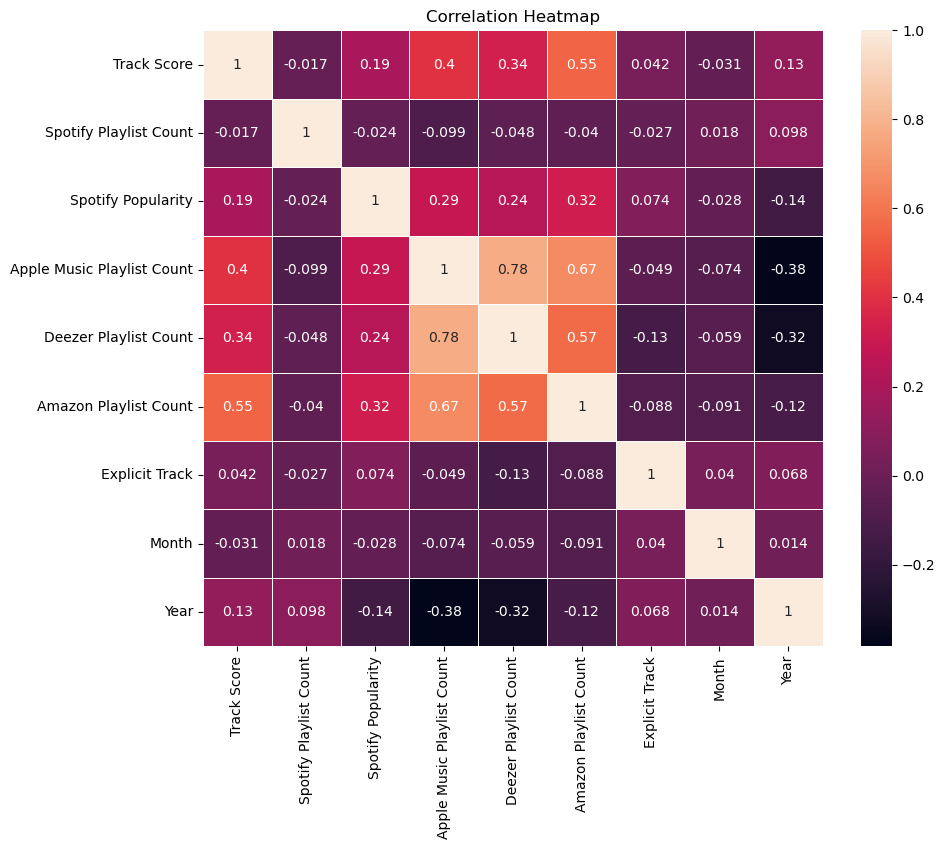

In [119]:
correlation_matrix = df[numerical_cols].corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

#### Scater Plot

##### Apple Music Playlist count vs Deezer Playlist Count

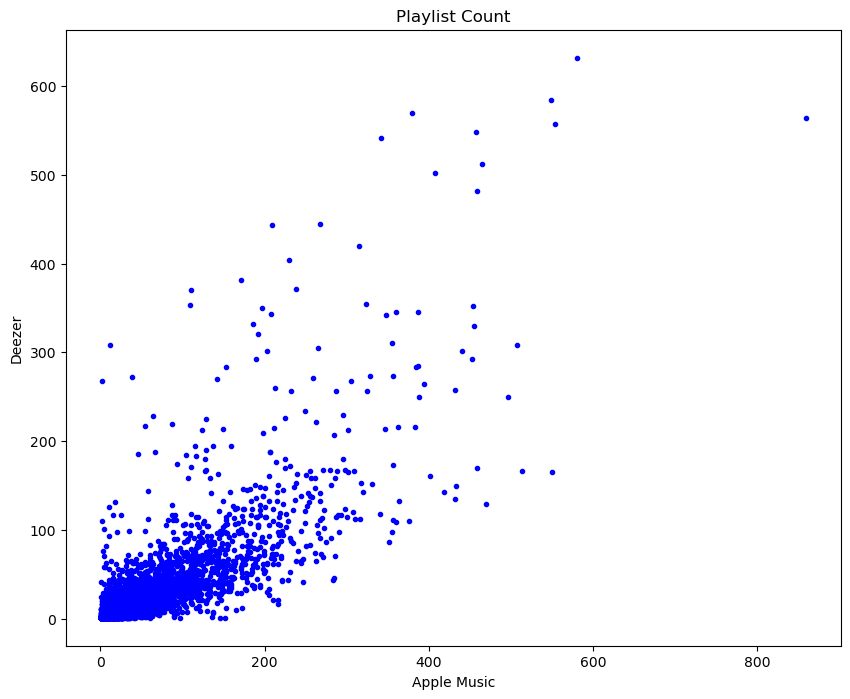

In [116]:
plt.figure(figsize=(10, 8))
plt.scatter(df['Apple Music Playlist Count'], df['Deezer Playlist Count'], color='blue', marker='.')
plt.xlabel('Apple Music')
plt.ylabel('Deezer')
plt.title('Playlist Count')
plt.show()